In [1]:
# 모듈 로딩
# 1. 모델관련
import torch                                 
import torch.nn as nn                        
import torch.nn.functional as F            

# 2. 데이터 셋 관련                    
from torch.utils.data import DataLoader, Dataset

# 3. 최적화에 관련
import torch.optim as optim    # 최적화 기법 관련 모듈

# 4. 모델 평가
from torchmetrics.classification import MulticlassF1Score

# 5. 모델의 구조를 보는 모듈
from torchinfo import summary               

# 6. Data 관련
import pandas as pd                
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split

In [2]:
DATA_file =r'C:\Users\KDP-23\Desktop\Torch_CV\data\mnist_train.csv'
A_train = pd.read_csv(DATA_file)
A_train

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [3]:
featureDF = A_train[A_train.columns[:-1]]
featureDF

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
targetDF = A_train[A_train.columns[-1:]]
targetDF

,5
0,0
1,4
2,1
3,9
4,2
...,...
59994,8
59995,3
59996,5
59997,6


In [5]:
len(targetDF['5'].value_counts())

10

In [6]:
DATA_file =r'C:\Users\KDP-23\Desktop\Torch_CV\data\mnist_test.csv'
A_test = pd.read_csv(DATA_file)
A_test

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667,7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [7]:
[A_test.isna().sum()]

[0        0
 0.1      0
 0.2      0
 0.3      0
 0.4      0
         ..
 0.664    0
 0.665    0
 0.666    0
 0.667    0
 7        0
 Length: 785, dtype: int64]

In [8]:
featureDF_test = A_test[A_test.columns[:-1]]
featureDF_test

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
targetDF_test = A_test[A_test.columns[-1:]]
targetDF_test

,7
0,2
1,1
2,0
3,4
4,1
...,...
9994,2
9995,3
9996,4
9997,5


In [10]:
len(targetDF_test['7'].value_counts())

10

[2] 모델 클래스 설계 및 정의

In [11]:
class MCMModel(nn.Module):

    # 모델 구조 구성 및 인스턴스 생성 메서드
    def __init__(self):
        super().__init__()

        self.in_layer = nn.Linear(784,512)
        self.hd1_layer = nn.Linear(512,256)
        self.hd2_layer = nn.Linear(256,128)
        self.hd3_layer = nn.Linear(128,64)
        self.hd4_layer = nn.Linear(64,32)
        self.out_layer = nn.Linear(32,10) 

    # 순방향(forward) 학습 진행 메서드 
    def forward(self, input_data):

        # 입력층 
        y = self.in_layer(input_data)   
        y = F.relu(y)                  

        # 은닉층1
        y=self.hd1_layer(y)
        y = F.relu(y)

        # 은닉층2
        y=self.hd2_layer(y)
        y = F.relu(y)
        
        # 은닉층3
        y=self.hd3_layer(y)
        y = F.relu(y)
        
        # 은닉층4
        y=self.hd4_layer(y)
        y = F.relu(y)

        # 출력층 
        return self.out_layer(y)

In [12]:
model = MCMModel()
print(model)

MCMModel(
  (in_layer): Linear(in_features=784, out_features=512, bias=True)
  (hd1_layer): Linear(in_features=512, out_features=256, bias=True)
  (hd2_layer): Linear(in_features=256, out_features=128, bias=True)
  (hd3_layer): Linear(in_features=128, out_features=64, bias=True)
  (hd4_layer): Linear(in_features=64, out_features=32, bias=True)
  (out_layer): Linear(in_features=32, out_features=10, bias=True)
)


[3] 데이터셋 클래스 설계 및 정의

In [13]:
class MDataset(Dataset):
    def __init__(self, featureDF, targetDF):
        self.featureDF = featureDF
        self.targetDF = targetDF
        self.n_rows = featureDF.shape[0] 
        self.n_features = featureDF.shape[1] 
    
    def __len__(self):
        return self.n_rows
    
    def __getitem__(self, index):
    
        # 텐서화
        featureTS = torch.FloatTensor(self.featureDF.iloc[index].values) 
        targetTS = torch.FloatTensor(self.targetDF.iloc[index].values)

        # 피쳐와 타겟 반환
        return featureTS, targetTS

[4] 학습 준비

In [14]:
## 학습 진행 관련 설정
EPOCH = 200
BATCH_SIZE = 10
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
LR = 0.001

In [15]:
# 모델 인스턴스
model = MCMModel()

## DS와 DL 인스턴스
# 학습용, 검증용 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(featureDF, targetDF, random_state=1)

print(f'{X_train.shape} {X_val.shape}')
print(f'{y_train.shape} {y_val.shape}')
print(f'{y_train.value_counts()} {y_val.value_counts()}')

# 학습용, 검즈용, 테스트용 데이터셋 확인
trainDS = MDataset(X_train, y_train)
testDS = MDataset(featureDF_test, targetDF_test)
valDS = MDataset(X_val, y_val)

# 학습용 데이터로더 인스턴스
trainDL = DataLoader(trainDS, batch_size=BATCH_SIZE)

(44999, 784) (15000, 784)
(44999, 1) (15000, 1)
5
1    5092
7    4701
3    4600
9    4497
6    4450
0    4449
2    4431
4    4384
8    4348
5    4047
Name: count, dtype: int64 5
1    1650
7    1564
3    1531
2    1527
8    1503
0    1474
6    1468
4    1458
9    1452
5    1373
Name: count, dtype: int64


In [16]:
import os

# 저장 경로
SAVE_PATH = '../models/hw0924/'

# 저장 파일명
SAVE_FILE = 'model_train_wbs.pth'

# 모델 구조 및 파라미터 모두 저장 파일명
SAVE_MODEL ='model_all.pth'

# 경로상 폴더 존재 여부 체크
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

In [17]:
import torch.optim.lr_scheduler as lr_scheduler

In [18]:
# 최적화 인스턴스 
optimizer = optim.Adam(model.parameters(), lr=LR)

# 최적화 스케줄링 인스턴스 생성 ==> lr조절 및 성능 개선 여부 체크
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=5, verbose=True)

# 소실함수 인스턴스
crossLoss = nn.CrossEntropyLoss()

c:\Users\KDP-23\anaconda3\envs\Torch_CV_38\lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [19]:
## 학습의 효과 확인, 손실값과 성능평가값 저장 필요 , 검증기능을 
LOSS_HISTORY, SCORE_HISTORY = [[], []], [[], []]
CNT = len(trainDL)

# best_score = 0.0

for epoch in range(EPOCH):
    # 학습 모드로 모델 설정 >> 에포크 단위로 학습과 검증 진행시 for문 안에서 껐다 켯다 해야함! 
    model.train()
    
    # 배치 크기 만큼 데이터 로딩해서 학습 진행
    loss_total = 0
    score_total = 0

    for featureTS, targetTS in trainDL:

        # 학습 진행
        pre_y = model(featureTS)

        # 손실 계산 : nn.CrossEntropyLoss 요구사항 
        #           >> 정답/타겟은 0D or 1D, 타입은 long
        loss = crossLoss(pre_y, targetTS.reshape(-1).long()) 
        loss_total += loss.item()

        # 성능 평가 계산
        score = MulticlassF1Score(num_classes=10)(pre_y, targetTS.reshape(-1)) 
        score_total += score.item()

        # 최적화 진행
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 에포크 당 검증 기능
    # 모델 검증 모드 설정 >> 검증이기에 최적화 업데이트 불필요
    model.eval() 
    with torch.no_grad():
        
        # 검증 데이터셋
        val_featrueTS = torch.FloatTensor(valDS.featureDF.values)
        val_targetTS = torch.FloatTensor(valDS.targetDF.values)

        # 추론 / 평가 
        pre_val = model(val_featrueTS)
        print(pre_val.shape, val_targetTS.reshape(-1).shape)

        # 손실
        loss_val = crossLoss(pre_val, val_targetTS.reshape(-1).long())
        
        # 성능평가
        score_val = MulticlassF1Score(num_classes=10)(pre_val, val_targetTS.reshape(-1))
    
    # if score_val > best_score:
    #     best_score = score_val
    #     torch.save(model.state_dict(), 'best_model.pth')
    #     print(f"New best model saved with score: {best_score}")
    
    # 에포크 당 손실값과 성능평가값 저장
    LOSS_HISTORY[0].append(loss_total/CNT)
    SCORE_HISTORY[0].append(score_total/CNT)

    LOSS_HISTORY[1].append(loss_val)
    SCORE_HISTORY[1].append(score_val)

    print(f'[{epoch+1}/{EPOCH}]\n- [TRAIN] LOSS : {LOSS_HISTORY[0][-1]} SCORE : {SCORE_HISTORY[0][-1]}')
    print(f'- [VALID] LOSS : {LOSS_HISTORY[1][-1]} SCORE : {SCORE_HISTORY[1][-1]}')

    # 최적화 스케줄러 인스턴스 업데이트 
    scheduler.step(score_val) # loss는 min, score는 max
    print(f'scheduler.num_bad_epochs => {scheduler.num_bad_epochs}', end=' ')
    print(f'scheduler.patience => {scheduler.patience}')

    # 손실 감소(또는 성능 개선)이 안되는 경우 조기 종료
    if scheduler.num_bad_epochs >= scheduler.patience:
        print(f'{epoch}/{EPOCH} : {scheduler.patience} EPOCH 성능 개선이 없어서 조기종료함')
        break 

torch.Size([15000, 10]) torch.Size([15000])
[1/200]
- [TRAIN] LOSS : 0.31955394126397085 SCORE : 0.8693405785270863
- [VALID] LOSS : 0.17027942836284637 SCORE : 0.9576528072357178
scheduler.num_bad_epochs => 0 scheduler.patience => 5
torch.Size([15000, 10]) torch.Size([15000])
[2/200]
- [TRAIN] LOSS : 0.18375531809895726 SCORE : 0.9279366449846161
- [VALID] LOSS : 0.24560825526714325 SCORE : 0.9412690997123718
scheduler.num_bad_epochs => 1 scheduler.patience => 5
torch.Size([15000, 10]) torch.Size([15000])
[3/200]
- [TRAIN] LOSS : 0.14205677282157372 SCORE : 0.9454404736889733
- [VALID] LOSS : 0.20196889340877533 SCORE : 0.9544743895530701
scheduler.num_bad_epochs => 2 scheduler.patience => 5
torch.Size([15000, 10]) torch.Size([15000])
[4/200]
- [TRAIN] LOSS : 0.11754038351955973 SCORE : 0.9538972169955572
- [VALID] LOSS : 0.1570121794939041 SCORE : 0.9669431447982788
scheduler.num_bad_epochs => 0 scheduler.patience => 5
torch.Size([15000, 10]) torch.Size([15000])
[5/200]
- [TRAIN] LOS

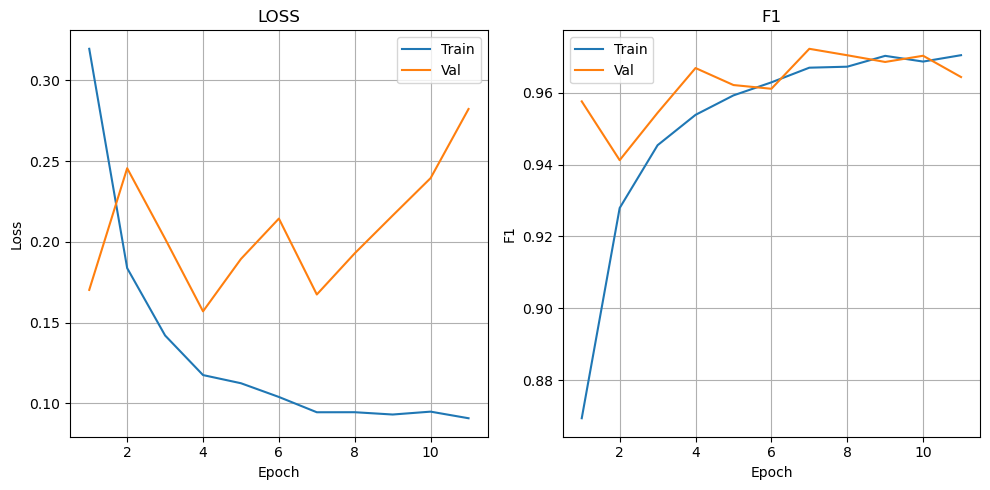

In [20]:
# 학습 후 loss 시각화
import matplotlib.pyplot as plt

fg, axes=plt.subplots(1,2, figsize=(10,5), sharex=True)
axes[0].plot(range(1, epoch+1), LOSS_HISTORY[0][:epoch], label='Train')
axes[0].plot(range(1, epoch+1), LOSS_HISTORY[1][:epoch], label='Val')
axes[0].grid()
axes[0].legend()
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_title("LOSS")


axes[1].plot(range(1, epoch+1), SCORE_HISTORY[0][:epoch], label='Train')
axes[1].plot(range(1, epoch+1), SCORE_HISTORY[1][:epoch], label='Val')
axes[1].grid()
axes[1].legend()
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("F1")
axes[1].set_title("F1")
plt.tight_layout()
plt.show()

In [21]:
# 모델 teat
model.eval()
with torch.no_grad():

    # test 데이터셋
    test_featrueTS=torch.FloatTensor(testDS.featureDF.values)
    test_targetTS=torch.FloatTensor(testDS.targetDF.values)
        
    # 추론/평가
    pre_test=model(test_featrueTS)
    
    # 손실 / 성능평가
    loss_test=crossLoss(pre_test, test_targetTS.reshape(-1).long())
    score_test=MulticlassF1Score(num_classes=10)(pre_test, test_targetTS.reshape(-1))
    
print(f'- [TEST] LOSS : {loss_test.item()} SCORE : {score_test.item()}')

- [TEST] LOSS : 0.24172888696193695 SCORE : 0.9707232713699341


In [22]:
# 모델 저장                                                                                           
torch.save(model, SAVE_PATH+SAVE_MODEL)